In [1]:
from data_import import *
import matplotlib.pyplot as plt

# LOAD THE DATA AND SPLIT UP THINGS
X_tr, Y_tr, X_val, Y_val, classes, filepaths = read_csv_as_numpy()

print(X_tr.shape)

(10212, 2500)


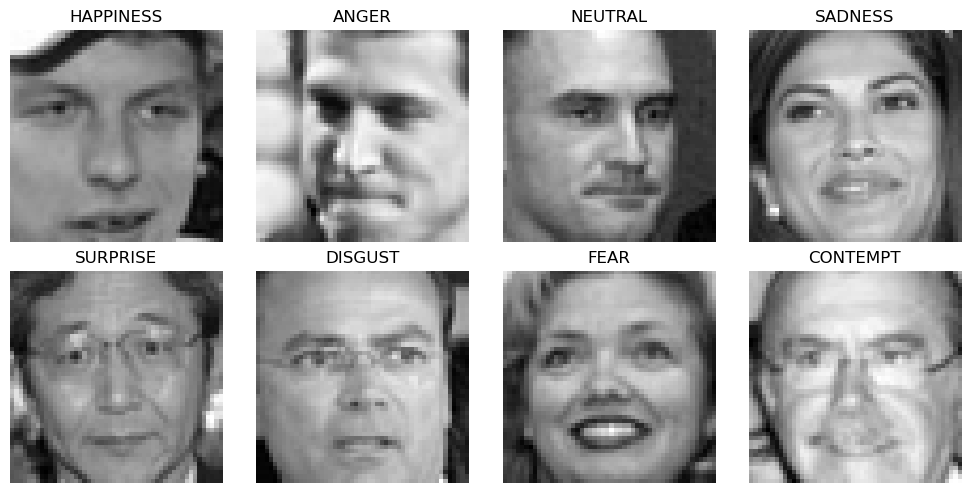

In [2]:
# Dictionary to store one sample per class
unique_samples = {}

# Collect one sample per class
for i in range(len(Y_tr)):
    label = classes[Y_tr[i]]  # Get the class name
    if label not in unique_samples:
        unique_samples[label] = (X_tr[i], filepaths[i])
        if len(unique_samples) == 8:  # Stop when we have 8 samples
            break

# Number of rows and columns
rows, cols = 2, 4

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2.5, rows * 2.5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Display each image
for ax, (label, (image, filepath)) in zip(axes, unique_samples.items()):
    ax.imshow(image.reshape(50, 50), cmap='gray')
    ax.set_title(label)
    ax.axis('off')  # Hide axes for clarity

# Hide any unused subplots
for ax in axes[len(unique_samples):]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# TRAIN MODEL

# sklearn's mlp classifier requires flat data, so we flattened it

errors = []


# nn = MLPClassifier(hidden_layer_sizes=[128, 64],
#                     activation='relu',
#                     solver='sgd',
#                     batch_size = 256,
#                     learning_rate='constant',
#                     learning_rate_init=0.001)

nn = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=200)


nn.fit(X_tr, Y_tr)
error_curve_train = nn.loss_curve_

# plt.plot(error_curve_train)
# plt.xlim(0, 100)
# plt.show()

# y_pred = nn.predict(X_val)
# print(len(y_pred))
err = 1 - nn.score(X_val, Y_val)
print(f"Error: {err}")
# print(f"Predicted: {y_pred}   Actual: {Y_val}")

# print(classification_report(Y_val, y_pred))

# GRAPH

Error: 0.4747356051703878


In [6]:
# CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


num_classes = 8      # 8 different emotions
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),  # or (50, 50, 3) for RGB
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_tr, Y_tr, epochs=10)


loss, accuracy = cnn.evaluate(X_val, Y_val)

# Calculate error rate
error_rate = 1 - accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")





Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 2500), dtype=float32). Expected shape (None, 50, 50, 1), but input has incompatible shape (None, 2500)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 2500), dtype=float32)
  • training=True
  • mask=None